In [19]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn as sk
import os, glob, shutil, math, time

########################################################################
# This section rescales the data. For most ML models, we want to       #
# rescale so that we are analyzing data consistently (scale invariant) #
########################################################################
def data_rescale(scaled_dat,train_mean,train_var):
    d = np.shape(train_mean)[0]
    #print('unnormalizing with number of dimensions = ' +str(d))
    dat = (np.multiply(scaled_dat,np.sqrt(train_var))) + train_mean.T
    return(dat)
############################################################################
# Opposite to the above, normalizes the data based on some training values #
############################################################################
def data_normalize(data,train_mean,train_var):
    d = np.shape(train_mean)[0]
    print('normalizing with number of dimensions = ' +str(d))
    scaled_dat = np.divide((data - train_mean.T),np.sqrt(train_var),)
    return(scaled_dat)
    


In [20]:
data = pd.read_csv("/Users/adityanandy/BGU-workshop/Data/QM9/mu-qm-file.csv")

In [21]:
# forbid_names = ['comb_2_0']
# for forb in forbid_names:
#     data  =  data.loc[data['Unnamed: 0']  != forb]
print(data['u0'])

0        -0.631066
1        -0.441207
2        -0.339577
3        -0.614337
4        -0.480982
5        -0.571716
6        -1.068970
7        -0.766693
8        -1.068141
9        -0.939926
10       -1.028397
11       -0.864757
12       -1.509975
13       -1.212970
14       -1.200600
15       -1.282844
16       -0.983347
17       -1.481807
18       -1.315953
19       -1.141296
20       -1.952528
21       -1.660153
22       -1.072212
23       -0.933308
24       -0.787267
25       -1.019190
26       -0.879601
27       -0.975537
28       -1.520215
29       -1.508619
            ...   
133855   -2.735116
133856   -2.984682
133857   -2.727081
133858   -2.778933
133859   -2.691604
133860   -2.959853
133861   -2.927256
133862   -3.166465
133863   -2.906811
133864   -2.714148
133865   -2.620268
133866   -2.984697
133867   -3.277457
133868   -2.973493
133869   -2.682754
133870   -2.695881
133871   -2.780896
133872   -3.061731
133873   -2.757616
133874   -2.755437
133875   -2.871581
133876   -3.

In [22]:
## seed 
np.random.seed(4)
# get random partition
msk = np.random.rand(np.shape(data)[0]) < 0.01


# test and train split
train_data = data[msk]
test_data = data[~msk]

In [23]:
# get 
feature_names=[]
for ft in data.columns:
    if ft.find('u0') ==-1  and ft.find('runs') ==-1 and ft.find('mu') ==-1:
            feature_names.append(ft)
print(feature_names)

['f-chi-0-all', 'f-chi-1-all', 'f-chi-2-all', 'f-chi-3-all', 'f-Z-0-all', 'f-Z-1-all', 'f-Z-2-all', 'f-Z-3-all', 'f-I-0-all', 'f-I-1-all', 'f-I-2-all', 'f-I-3-all', 'f-T-0-all', 'f-T-1-all', 'f-T-2-all', 'f-T-3-all', 'f-S-0-all', 'f-S-1-all', 'f-S-2-all', 'f-S-3-all']


In [24]:
# COFs
train_data_y = train_data['mu']
test_data_y = test_data['mu']
# xvales
train_data_x = train_data[feature_names].values
test_data_x = test_data[feature_names].values
## data generation
m = np.shape(train_data_x)[0]
d = np.shape(train_data_x)[1]
p = 1
# normalization
train_var_x = np.var(train_data_x,0)
train_mean_x = np.mean(train_data_x,0).reshape(d,1).squeeze()
train_var_y = np.var(train_data_y,0).reshape(1)
train_mean_y = np.mean(train_data_y,0).reshape(1)
# scale
scaled_train_data_x = data_normalize(train_data_x,train_mean_x,train_var_x)
scaled_train_data_y = data_normalize(train_data_y,train_mean_y,train_var_y)
scaled_test_data_x = data_normalize(test_data_x,train_mean_x,train_var_x)
scaled_test_data_y = data_normalize(test_data_y,train_mean_y,train_var_y)

normalizing with number of dimensions = 20
normalizing with number of dimensions = 1
normalizing with number of dimensions = 20
normalizing with number of dimensions = 1


In [25]:
from sklearn import linear_model

#########################################
# This is just simple linear regression #
#########################################

reg = linear_model.LinearRegression()
reg.fit(scaled_train_data_x,scaled_train_data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
pred_train = data_rescale(reg.predict(scaled_train_data_x),train_mean_y,train_var_y)
real_train =  data_rescale(scaled_train_data_y,train_mean_y,train_var_y)
pred_test = data_rescale(reg.predict(scaled_test_data_x),train_mean_y,train_var_y)
real_test =  data_rescale(scaled_test_data_y,train_mean_y,train_var_y)
def rms(val):
    return(np.sqrt(np.mean(np.power(val,2))))
print('linear model TRAIN error is ' + str(rms(pred_train_cofs-real_train_cofs))+' kcal/mol')
print('linear model TEST error is ' + str(rms(pred_test_cofs-real_test_cofs))+' kcal/mol')

linear model TRAIN error is 1.27793257305 kcal/mol
linear model TEST error is 1.28681956115 kcal/mol


Text(0,0.5,'pred')

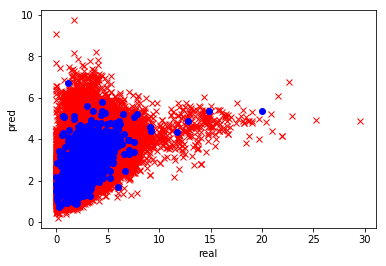

In [48]:
plt.plot(real_test,pred_test,'rx')
plt.plot(real_train,pred_train,'bo')
plt.xlabel('real')
plt.ylabel('pred')

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

In KRR!
Best parameters set found on development set:
{'alpha': 0.0001, 'gamma': 0.00050000000000000001, 'kernel': 'rbf'}
Grid scores on development set:
('Chosen Alpha: ', 0.0001)
('Chosen Gamma: ', 0.00050000000000000001)


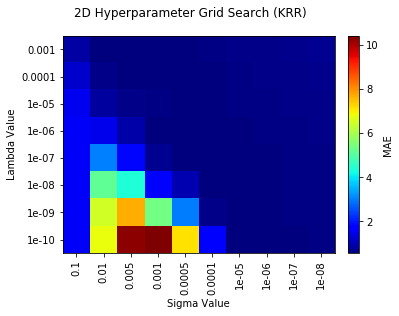

In [38]:
print('In KRR!')
lambdas = np.array([0.001, 0.0001,0.00001,0.000001,0.0000001,0.00000001,0.000000001,0.0000000001])
sigmas = np.array([0.1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001])
nus = np.array([1])

tuned_parameters = [{'kernel': ['rbf'], 'gamma': sigmas, 'alpha': lambdas}]
reshapedy = np.squeeze(scaled_train_data_y)

fig, axs = plt.subplots(1,1, facecolor='w', edgecolor='k',squeeze=False)
fig.subplots_adjust(hspace = .3, wspace= 1)
axs = axs.ravel()
clf = GridSearchCV(KernelRidge(), tuned_parameters, cv=10, scoring='neg_mean_absolute_error')
clf.fit(scaled_train_data_x, reshapedy)

print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

scores = -(clf.cv_results_['mean_test_score'].reshape(len(lambdas),len(sigmas)))
im = axs[0].imshow(scores, interpolation='nearest', cmap=plt.cm.jet)
axs[0].set_xticks(np.arange(len(sigmas)))
axs[0].set_yticks(np.arange(len(lambdas)))
axs[0].set_xticklabels(['{:g}'.format(float('{:.3g}'.format(j))) for j in tuned_parameters[0]['gamma']])
axs[0].set_yticklabels(['{:g}'.format(float('{:.3g}'.format(j))) for j in tuned_parameters[0]['alpha']])
axs[0].set_xlabel('Sigma Value')
axs[0].set_ylabel('Lambda Value')
for tick in axs[0].get_xticklabels():
    tick.set_rotation(90)
cbar = fig.colorbar(im, ax = axs[0], fraction=0.046, pad=0.04)#,boundaries = np.linspace(0.3, 0.8, 21))
cbar.set_label('MAE')
fig.suptitle('2D Hyperparameter Grid Search (KRR)')
print('Chosen Alpha: ', clf.best_params_['alpha'])
print('Chosen Gamma: ', clf.best_params_['gamma'])
final_model = KernelRidge(kernel = 'rbf', alpha = clf.best_params_['alpha'], gamma = clf.best_params_['gamma'])


In [41]:
final_model.fit(scaled_train_data_x, scaled_train_data_y)
krr_train = data_rescale(final_model.predict(scaled_train_data_x),train_mean_y,train_var_y)
real_train =  data_rescale(scaled_train_data_y,train_mean_y,train_var_y)
krr_test = data_rescale(final_model.predict(scaled_test_data_x),train_mean_y,train_var_y)
real_test =  data_rescale(scaled_test_data_y,train_mean_y,train_var_y)
print('KRR model TRAIN error is ' + str(rms(krr_train-real_train)))
print('KRR model TEST error is ' + str(rms(krr_test-real_test)))

KRR model TRAIN error is 1.15925841372
KRR model TEST error is 1.18176183774


Text(0,0.5,'pred')

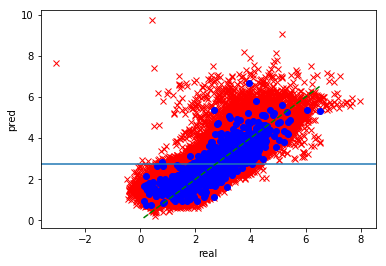

In [47]:
plt.plot(krr_test,pred_test,'rx')
plt.plot(krr_train,pred_train,'bo')
plt.axhline(y=np.mean(train_data['mu']))
plt.plot(np.linspace(min(krr_train),max(krr_train)),np.linspace(min(krr_train),max(krr_train)),'g--')
plt.xlabel('real')
plt.ylabel('pred')

KRR bad model TRAIN error is 0.51183917186
KRR bad model TEST error is 3.15223255536


(0, 10)

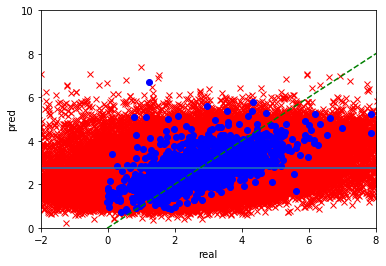

In [46]:
bad_model = KernelRidge(kernel = 'rbf', alpha = 1e-10, gamma = 0.001)
bad_model.fit(scaled_train_data_x, scaled_train_data_y)
krr_train_bad = data_rescale(bad_model.predict(scaled_train_data_x),train_mean_y,train_var_y)
krr_test_bad = data_rescale(bad_model.predict(scaled_test_data_x),train_mean_y,train_var_y)
print('KRR bad model TRAIN error is ' + str(rms(krr_train_bad-real_train)))
print('KRR bad model TEST error is ' + str(rms(krr_test_bad-real_test)))

# plt.plot(krr_train_bad,pred_train,'bo')
plt.plot(krr_test_bad,pred_test,'rx')
plt.plot(krr_train_bad,pred_train,'bo')
plt.axhline(y=np.mean(train_data['mu']))
plt.plot(np.linspace(min(krr_train_bad),max(krr_train_bad)),np.linspace(min(krr_train_bad),max(krr_train_bad)),'g--')
plt.xlabel('real')
plt.ylabel('pred')
plt.xlim([-2,8])
plt.ylim([0,10])